## Data generator for truck battery prediction

In [22]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
library(projectLib)
project <- projectLib::Project$new(projectId="f838cfb9-0018-49d7-9f9d-5c50e7282391", projectToken="p-5e7c6776b9a0993094bd61532c9227b698916cb7")
pc <- project$project_context


In [102]:
# Number of rows
n <- 1000

In [103]:
# Use normal distribution to randomly generate values for each column
kms <- rnorm(n, 10000, 4000)
time_in_drive <- rnorm(n, 10000, 5000)
time_idle <- rnorm(n, 1000, 400)
start_time <- rnorm(n, 10, 4)
n_starts <- rnorm(n, 500, 100)
avg_voltage <- rnorm(n, 24, 4)
avg_ambient_temperature <- rnorm(n, 60, 20)

# Compute risk as the normalized sum of the features.
risk <- kms / max(kms) + 
        time_in_drive / max(time_in_drive) +
        time_idle / max(time_idle) +
        start_time / max(start_time) +
        (kms / n_starts) / max(kms / n_starts) +
        (avg_voltage - mean(avg_voltage)) / max((avg_voltage - mean(avg_voltage)))

In [104]:
# Assemble data.frame
batteryData <- data.frame("Kilometers"=kms,
           "Drive_Time"=time_in_drive,
           "Idle_Time"=time_idle,
           "Avg_Start_Time"=start_time,
           "N_Starts"=n_starts,
           "Avg_Voltage"=avg_voltage,
           "Avg_Ambient_Temperature"=avg_ambient_temperature,
           "Risk"=risk
          )

In [105]:
batteryData

Kilometers,Drive_Time,Idle_Time,Avg_Start_Time,N_Starts,Avg_Voltage,Avg_Ambient_Temperature,Risk
10119.755,12729.09135,1142.6344,12.677497,537.8920,23.36065,56.40114,2.221409
10134.029,1445.42843,956.1519,5.301993,370.5297,20.49567,92.78201,1.240881
13099.486,-1705.73970,1050.1454,8.690896,300.6564,26.82168,51.95133,2.131804
12032.898,5510.22065,1267.1027,6.498936,582.1494,27.29457,80.38263,2.149746
12694.780,-99.76816,1010.2804,8.509697,581.6961,25.80494,52.99645,1.820714
7103.493,3826.96783,645.5284,12.486011,454.6836,22.46114,46.22451,1.386656
10073.161,22253.17549,1329.0920,15.949024,367.1918,24.60603,82.03670,3.017115
6845.656,16543.59072,1099.4610,9.996459,532.4786,23.78394,62.10143,2.049888
11079.020,14636.15645,1294.5657,10.518471,432.1212,27.21525,67.72840,2.698344
15776.206,10084.29030,1390.9317,11.027996,456.1547,25.65346,76.11112,2.777407


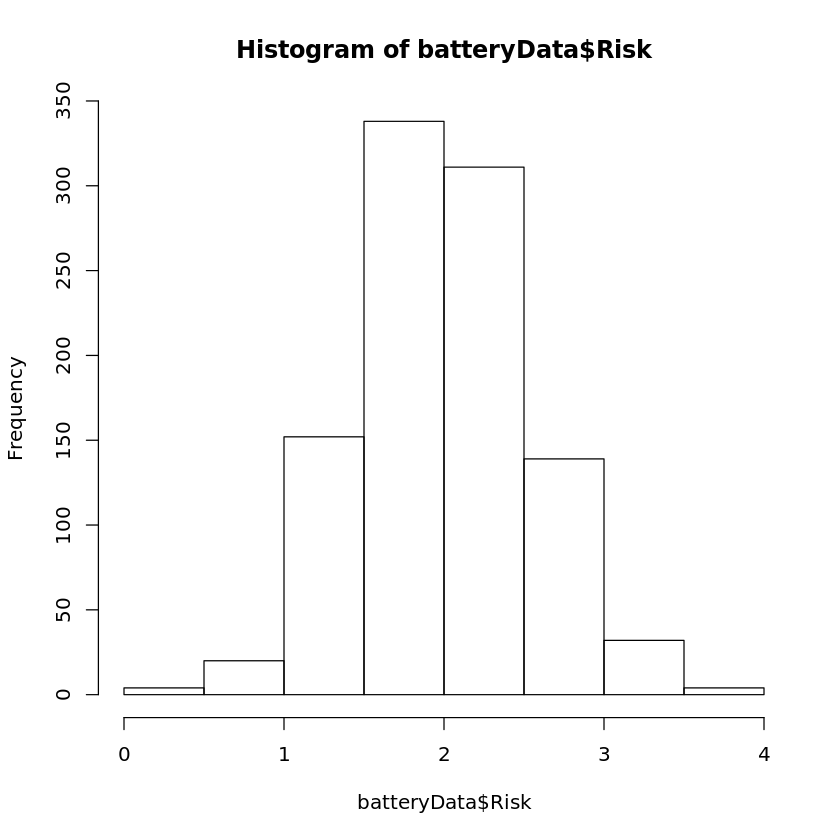

In [106]:
hist(batteryData$Risk)

In [107]:
# Add label column if Risk > threshold. Threshold comes from the histogram.
batteryData$Class <- (batteryData$Risk > 2)

In [108]:
# Use 5% of noise. This means that in 5% of the cases, the class will be flipped.
NOISE_LEVEL <- 0.05

In [109]:
filter <- runif(n) < NOISE_LEVEL

In [110]:
batteryData[filter, ]$Class <- !batteryData[filter, ]$Class

In [111]:
batteryData$Class <- as.factor(batteryData$Class)

In [112]:
batteryData$Risk <- NULL

In [113]:
str(batteryData)

'data.frame':	1000 obs. of  8 variables:
 $ Kilometers             : num  10120 10134 13099 12033 12695 ...
 $ Drive_Time             : num  12729.1 1445.4 -1705.7 5510.2 -99.8 ...
 $ Idle_Time              : num  1143 956 1050 1267 1010 ...
 $ Avg_Start_Time         : num  12.68 5.3 8.69 6.5 8.51 ...
 $ N_Starts               : num  538 371 301 582 582 ...
 $ Avg_Voltage            : num  23.4 20.5 26.8 27.3 25.8 ...
 $ Avg_Ambient_Temperature: num  56.4 92.8 52 80.4 53 ...
 $ Class                  : Factor w/ 2 levels "FALSE","TRUE": 2 1 2 2 1 1 2 2 2 2 ...


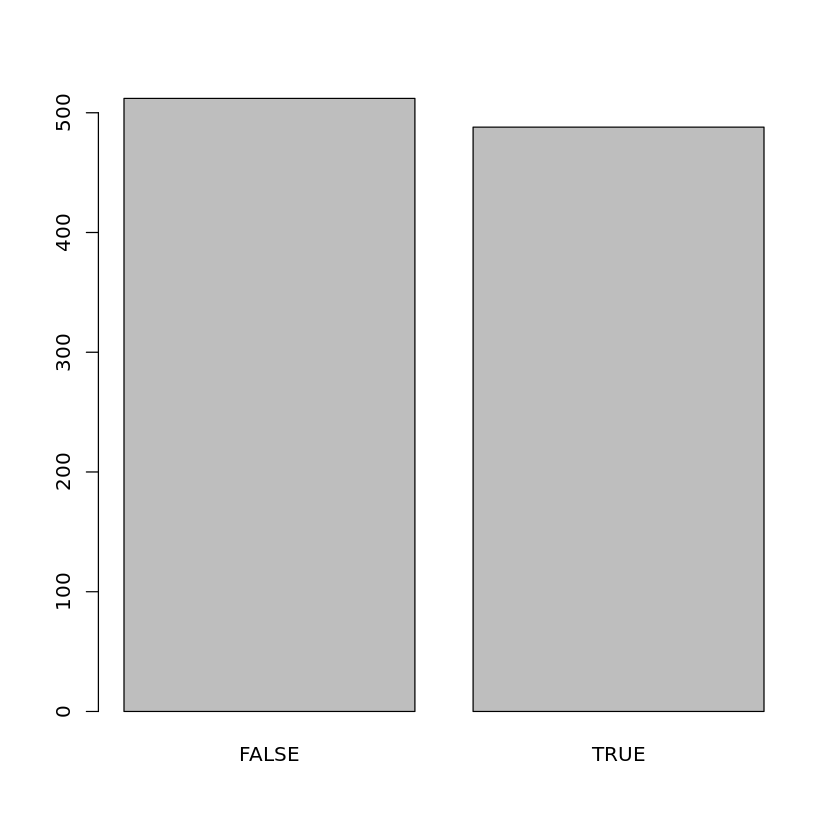

In [114]:
barplot(table(batteryData$Class))

In [115]:
# Create a Random Forest to test out the dataset.
library(randomForest)

In [116]:
train <- sample(nrow(batteryData), 0.7*nrow(batteryData), replace = FALSE)
trainSet <- batteryData[train,]
testSet <- batteryData[-train,]

In [117]:
model <- randomForest(Class ~ ., data = trainSet, ntree = 500 , importance = TRUE)

In [118]:
preds <- predict(model, testSet)

In [119]:
sum(preds == testSet$Class) / nrow(testSet)

[1] 0.8633333

In [120]:
fileName <- "Battery_Data.csv"
write.csv(batteryData, fileName, row.names=F)
project$save_data(fileName, fileName, overwrite=TRUE)

$file_name
[1] "Battery_Data.csv"

$bucket_name
[1] "truckbatterylifeprediction-donotdelete-pr-swfvdf0w0a2hrf"

$message
[1] "File  Battery_Data.csv  has been written successfully to the associated OS."

$asset_id
[1] "40abc422-f098-4f9a-a288-a4329107526f"